In [ ]:
print("Rashmi research started")



Rashmi research started


In [14]:
from tensorflow.keras.models import load_model

model = load_model("soil_model.h5")
print("Model loaded successfully")


Model loaded successfully


In [ ]:
import kagglehub
path = kagglehub.dataset_download("ai4a-lab/comprehensive-soil-classification-datasets")

100%|██████████| 490M/490M [00:14<00:00, 35.4MB/s]

Extracting files...


In [ ]:
print(path)




/root/.cache/kagglehub/datasets/ai4a-lab/comprehensive-soil-classification-datasets/versions/1


In [ ]:
import os

print(os.listdir(path))


['Orignal-Dataset', 'CyAUG-Dataset']


In [ ]:
aug_path = os.path.join(path, "CyAUG-Dataset")
print(os.listdir(aug_path))


['Alluvial_Soil', 'Yellow_Soil', 'Arid_Soil', 'Laterite_Soil', 'Mountain_Soil', 'Red_Soil', 'Black_Soil']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    aug_path,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    aug_path,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 4080 images belonging to 7 classes.
Found 1016 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dense(train_data.num_classes, activation="softmax")
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.6982 - loss: 0.9055 - val_accuracy: 0.7618 - val_loss: 0.7307
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.9252 - loss: 0.2295 - val_accuracy: 0.7844 - val_loss: 0.7748
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.9398 - loss: 0.1798 - val_accuracy: 0.7825 - val_loss: 0.8743
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9536 - loss: 0.1384 - val_accuracy: 0.7874 - val_loss: 0.8718
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.9578 - loss: 0.1247 - val_accuracy: 0.7785 - val_loss: 0.8180
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9595 - loss: 0.1204 - val_accuracy: 0.7677 - val_loss: 1.0323
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9571 - loss: 0.1224 - val_accuracy: 0.8346 - val_loss: 0.6877
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.9669 - loss: 0.0957 - val_accu

In [ ]:
# Unfreeze last 30 layers of MobileNetV2
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 0.5934 - loss: 2.2293 - val_accuracy: 0.7972 - val_loss: 1.3111
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 371s 3s/step - accuracy: 0.8758 - loss: 0.4137 - val_accuracy: 0.7776 - val_loss: 1.3400
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.9239 - loss: 0.2246 - val_accuracy: 0.7933 - val_loss: 1.1131
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - accuracy: 0.9280 - loss: 0.2067 - val_accuracy: 0.8022 - val_loss: 1.0492
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - accuracy: 0.9468 - loss: 0.1544 - val_accuracy: 0.8150 - val_loss: 0.9458


In [ ]:
model.save("soil_model.h5")


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img("test.jpg", target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction)

class_names = list(train_data.class_indices.keys())

print("Predicted Soil Type:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Soil Type: Red_Soil


In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img("test1.jpeg", target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction)

class_names = list(train_data.class_indices.keys())

print("Predicted Soil Type:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Soil Type: Black_Soil


In [17]:
crop_map = {
    "Alluvial_Soil": ["Rice", "Wheat", "Sugarcane"],
    "Arid_Soil": ["Millet", "Barley"],
    "Black_Soil": ["Cotton", "Soybean", "Groundnut"],
    "Laterite_Soil": ["Cashew", "Tea", "Coffee"],
    "Mountain_Soil": ["Apple", "Potato", "Maize"],
    "Red_Soil": ["Pulses", "Millets", "Groundnut"],
    "Yellow_Soil": ["Rice", "Vegetables", "Pulses"]
}

soil = "Black_Soil"   # predicted soil
print("Predicted Soil:", soil)
print("Recommended Crops:", crop_map[soil])


Predicted Soil: Black_Soil
Recommended Crops: ['Cotton', 'Soybean', 'Groundnut']


In [19]:
# Crop recommendation mapping
crop_map = {
    "Alluvial_Soil": ["Rice", "Wheat", "Sugarcane"],
    "Arid_Soil": ["Millet", "Barley"],
    "Black_Soil": ["Cotton", "Soybean", "Groundnut"],
    "Laterite_Soil": ["Cashew", "Tea", "Coffee"],
    "Mountain_Soil": ["Apple", "Potato", "Maize"],
    "Red_Soil": ["Pulses", "Millets", "Groundnut"],
    "Yellow_Soil": ["Rice", "Vegetables", "Pulses"]
}

# Get soil from model prediction
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
predicted_soil = class_names[predicted_class]

print("Predicted Soil:", predicted_soil)
print("Recommended Crops:", crop_map[predicted_soil])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Soil: Red_Soil
Recommended Crops: ['Pulses', 'Millets', 'Groundnut']


In [21]:
import matplotlib.pyplot as plt


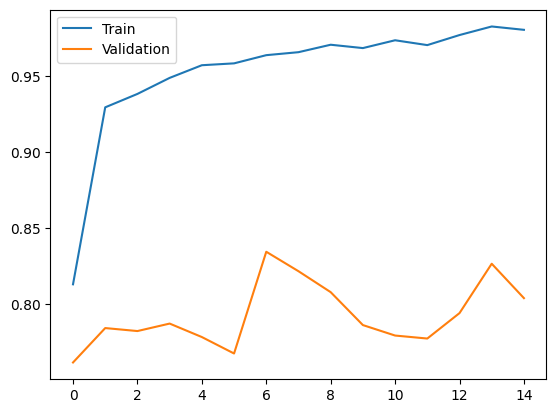

In [22]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()


In [24]:
img = image.load_img("test1.jpeg", target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

crop_map = {
    "Alluvial_Soil": ["Rice", "Wheat", "Sugarcane"],
    "Arid_Soil": ["Millet", "Barley"],
    "Black_Soil": ["Cotton", "Soybean", "Groundnut"],
    "Laterite_Soil": ["Cashew", "Tea", "Coffee"],
    "Mountain_Soil": ["Apple", "Potato", "Maize"],
    "Red_Soil": ["Pulses", "Millets", "Groundnut"],
    "Yellow_Soil": ["Rice", "Vegetables", "Pulses"]
}

pred = model.predict(img_array)
predicted_class = np.argmax(pred)
predicted_soil = class_names[predicted_class]

print("Predicted Soil:", predicted_soil)
print("Recommended Crops:", crop_map[predicted_soil])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Soil: Black_Soil
Recommended Crops: ['Cotton', 'Soybean', 'Groundnut']


In [25]:
test_folder = "/content/test_images"

for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)

    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    pred = model.predict(img_array)
    predicted_class = np.argmax(pred)
    predicted_soil = class_names[predicted_class]

    print("\nImage:", img_name)
    print("Predicted Soil:", predicted_soil)
    print("Recommended Crops:", crop_map[predicted_soil])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step

Image: test1.jpeg
Predicted Soil: Black_Soil
Recommended Crops: ['Cotton', 'Soybean', 'Groundnut']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

Image: test3.jpeg
Predicted Soil: Laterite_Soil
Recommended Crops: ['Cashew', 'Tea', 'Coffee']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

Image: test4.jpeg
Predicted Soil: Red_Soil
Recommended Crops: ['Pulses', 'Millets', 'Groundnut']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

Image: test.jpg
Predicted Soil: Red_Soil
Recommended Crops: ['Pulses', 'Millets', 'Groundnut']


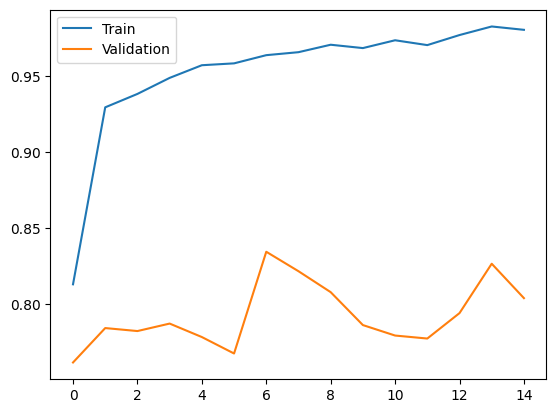

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()


In [27]:
# Best validation accuracy
best_val_acc = max(history.history['val_accuracy'])

# Final epoch accuracies
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print("Best Validation Accuracy: {:.2f}%".format(best_val_acc * 100))
print("Final Training Accuracy: {:.2f}%".format(final_train_acc * 100))
print("Final Validation Accuracy: {:.2f}%".format(final_val_acc * 100))


Best Validation Accuracy: 83.46%
Final Training Accuracy: 98.06%
Final Validation Accuracy: 80.41%


In [28]:
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_loss = min(history.history['val_loss'])

print("Best Epoch:", best_epoch)
print("Best Validation Loss:", best_val_loss)


Best Epoch: 7
Best Validation Loss: 0.687664806842804
